Total original images: 150


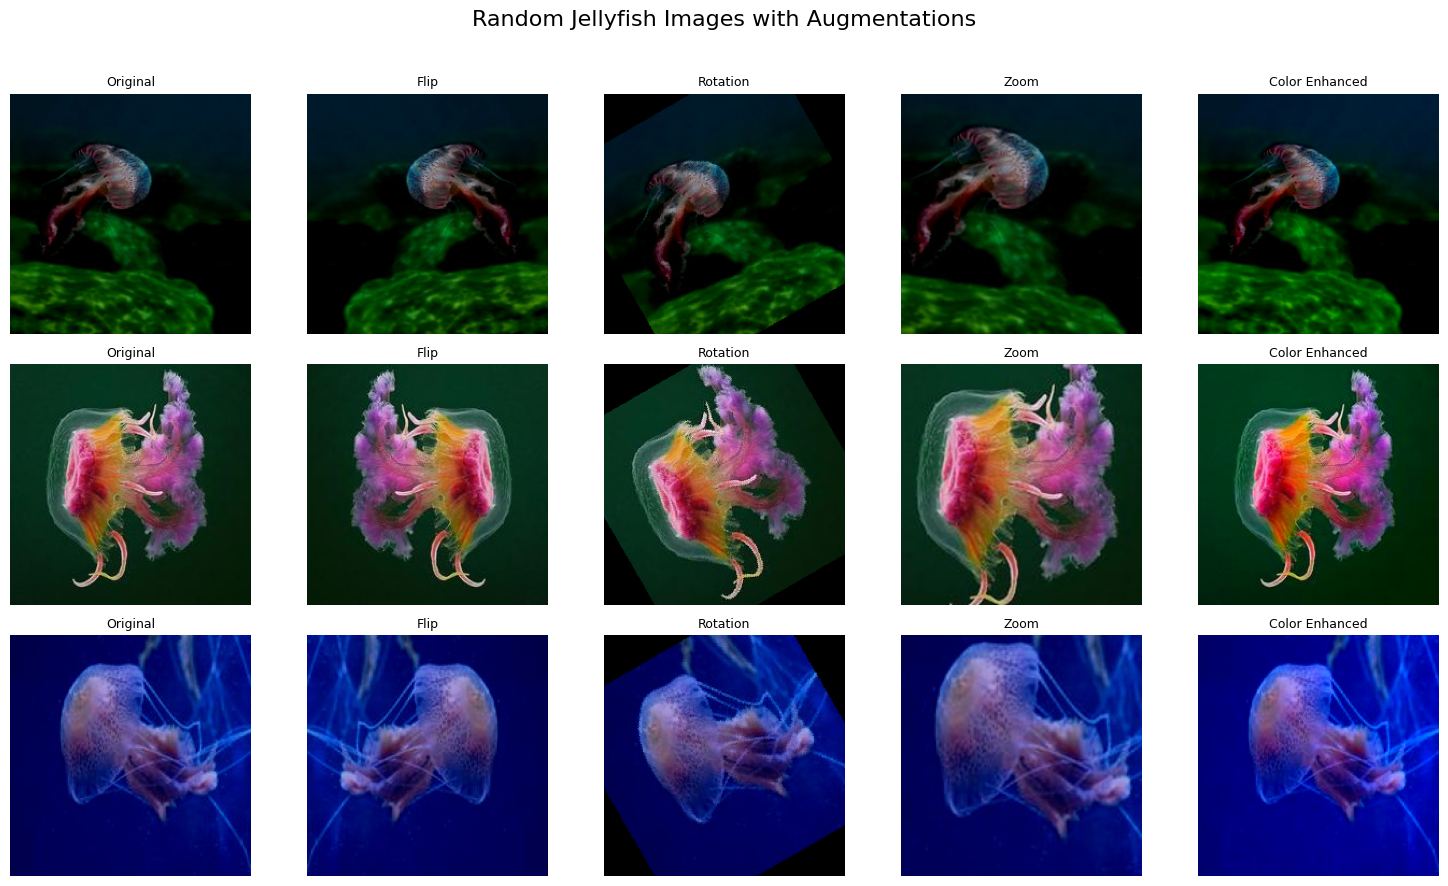

Total images after augmentation (if all were augmented): 750


In [1]:
import os
import random
from PIL import Image, ImageEnhance, ImageOps
import matplotlib.pyplot as plt

input_dir = r"C:/Users/D.Sathiya Pandi/Downloads/jelly/mauve_stinger_jellyfish"

def augment_image(img):
    aug_images = []

    flip = ImageOps.mirror(img)
    aug_images.append(flip)

    rotate = img.rotate(30)
    aug_images.append(rotate)

    width, height = img.size
    crop_factor = 0.8
    left = int(width * (1 - crop_factor) / 2)
    top = int(height * (1 - crop_factor) / 2)
    right = int(width * (1 + crop_factor) / 2)
    bottom = int(height * (1 + crop_factor) / 2)
    zoom = img.crop((left, top, right, bottom)).resize((width, height))
    aug_images.append(zoom)

    color = ImageEnhance.Color(img).enhance(1.5)
    aug_images.append(color)

    return aug_images


all_images = [f for f in os.listdir(input_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
total_original_images = len(all_images)
print(f"Total original images: {total_original_images}")


selected_images = random.sample(all_images, 3)

labels = ["Original", "Flip", "Rotation", "Zoom", "Color Enhanced"]
fig, axs = plt.subplots(3, 5, figsize=(15, 9))
fig.suptitle("Random Jellyfish Images with Augmentations", fontsize=16)

for row, filename in enumerate(selected_images):
    path = os.path.join(input_dir, filename)
    original_img = Image.open(path).convert("RGB")
    augmented_imgs = augment_image(original_img)
    images = [original_img] + augmented_imgs

    for col in range(5):
        axs[row, col].imshow(images[col])
        axs[row, col].axis("off")
        axs[row, col].set_title(labels[col], fontsize=9)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


total_augmented_images = total_original_images * 5
print(f"Total images after augmentation (if all were augmented): {total_augmented_images}")
